In [ ]:
# In this notebook, I'd like to know how consistently "Vergilian" Vergil is.

In [14]:
from bs4 import BeautifulSoup
import importlib
import random
from mqdq import counter_factory as cf
from mqdq import line_analyzer as la
from mqdq import metrics

with open('../VERG-aene.xml') as fh:
    aen_soup = BeautifulSoup(fh,"xml")
    
aen_books = [list(filter(lambda l: l['pattern']!='corrupt', d('line'))) for d in aen_soup('division')]    
aen = [l for l in aen_soup('line') if l['pattern'] != 'corrupt']

In [15]:
(len(aen), len(aen_books))

(9840, 12)

In [9]:
# Let's look at the overall distribution of Vergil's hexameter patterns.

importlib.reload(metrics)
metrics.summarize(aen, cf.pattern_counter_raw)

DDDD | Obs:  212 (    2.15% )
DDDS | Obs:  670 (    6.81% )
DDSD | Obs:  459 (    4.66% )
DDSS | Obs: 1159 (   11.78% )
DSDD | Obs:  353 (    3.59% )
DSDS | Obs: 1100 (   11.18% )
DSSD | Obs:  566 (    5.75% )
DSSS | Obs: 1412 (   14.35% )
SDDD | Obs:  195 (    1.98% )
SDDS | Obs:  580 (    5.89% )
SDSD | Obs:  373 (    3.79% )
SDSS | Obs:  941 (    9.56% )
SSDD | Obs:  229 (    2.33% )
SSDS | Obs:  593 (    6.03% )
SSSD | Obs:  301 (    3.06% )
SSSS | Obs:  697 (    7.08% )


In [29]:
# OK, he is mostly dactylic, with a particular fondness for DSSS, DSDS and DDSS.
# If we take a random sample, we expect to see a good chi-square fit, ie a low
# chi-square statistic. We're comparing Vergil to himself.

samp = random.sample(aen, 1000)
metrics.chisq(samp, aen, cf.pattern_counter_raw)

Power_divergenceResult(statistic=9.399894091031678, pvalue=0.8556976925637461)

In [39]:
# And, we can see that our random sample falls pretty close to 
# the overall patterns. 1000 is almost 10% of the work, so that's
# not too surprising.

metrics.summarize_compare(samp, aen, cf.pattern_counter_raw)

DDDD | Obs:  24 Exp:  21.54 (    0.25% )
DDDS | Obs:  67 Exp:  68.09 (   -0.11% )
DDSD | Obs:  40 Exp:  46.65 (   -0.66% )
DDSS | Obs: 128 Exp: 117.78 (    1.02% )
DSDD | Obs:  37 Exp:  35.87 (    0.11% )
DSDS | Obs: 109 Exp: 111.79 (   -0.28% )
DSSD | Obs:  52 Exp:  57.52 (   -0.55% )
DSSS | Obs: 137 Exp: 143.50 (   -0.65% )
SDDD | Obs:  18 Exp:  19.82 (   -0.18% )
SDDS | Obs:  75 Exp:  58.94 (    1.61% )
SDSD | Obs:  44 Exp:  37.91 (    0.61% )
SDSS | Obs:  94 Exp:  95.63 (   -0.16% )
SSDD | Obs:  21 Exp:  23.27 (   -0.23% )
SSDS | Obs:  58 Exp:  60.26 (   -0.23% )
SSSD | Obs:  31 Exp:  30.59 (    0.04% )
SSSS | Obs:  65 Exp:  70.83 (   -0.58% )


In [27]:
# But is he always consistent?

for idx, b in enumerate(aen_books):
    print("Book: %2d, Chisq: %.2f, P-Value: %.2f"%(idx+1, *metrics.chisq(b,aen,cf.pattern_counter_raw)))

Book:  1, Chisq: 9.41, P-Value: 0.85
Book:  2, Chisq: 19.74, P-Value: 0.18
Book:  3, Chisq: 18.41, P-Value: 0.24
Book:  4, Chisq: 15.32, P-Value: 0.43
Book:  5, Chisq: 16.04, P-Value: 0.38
Book:  6, Chisq: 14.55, P-Value: 0.48
Book:  7, Chisq: 13.78, P-Value: 0.54
Book:  8, Chisq: 14.72, P-Value: 0.47
Book:  9, Chisq: 6.97, P-Value: 0.96
Book: 10, Chisq: 19.99, P-Value: 0.17
Book: 11, Chisq: 8.28, P-Value: 0.91
Book: 12, Chisq: 25.85, P-Value: 0.04


In [28]:
# Book 12 is the least 'Vergilian', but nothing looks really crazy.

# The patterns here are Dactyl or Spondee in the first four feet 
# (The last two feet are virtually always DS)
# Obs is how many we saw, Exp is how many we would expect to see
# based on the patterns in the Aeneid overall.

metrics.summarize_compare(aen_books[11], aen, cf.pattern_counter_raw)

DDDD | Obs:  19 Exp:  20.49 (   -0.16% )
DDDS | Obs:  56 Exp:  64.75 (   -0.92% )
DDSD | Obs:  33 Exp:  44.36 (   -1.19% )
DDSS | Obs:  91 Exp: 112.01 (   -2.21% )
DSDD | Obs:  28 Exp:  34.12 (   -0.64% )
DSDS | Obs: 122 Exp: 106.31 (    1.65% )
DSSD | Obs:  44 Exp:  54.70 (   -1.13% )
DSSS | Obs: 153 Exp: 136.46 (    1.74% )
SDDD | Obs:  15 Exp:  18.85 (   -0.40% )
SDDS | Obs:  72 Exp:  56.05 (    1.68% )
SDSD | Obs:  29 Exp:  36.05 (   -0.74% )
SDSS | Obs: 100 Exp:  90.94 (    0.95% )
SSDD | Obs:  25 Exp:  22.13 (    0.30% )
SSDS | Obs:  64 Exp:  57.31 (    0.70% )
SSSD | Obs:  25 Exp:  29.09 (   -0.43% )
SSSS | Obs:  75 Exp:  67.36 (    0.80% )


In [31]:
# Let's do the same test, but look at the patterns of his caesurae

for idx, b in enumerate(aen_books):
    print("Book: %2d, Chisq: %.2f, P-Value: %.2f"%(idx+1, *metrics.chisq(b,aen,lambda x: cf.caesura_counter(x, strict=True))))

Book:  1, Chisq: 29.09, P-Value: 0.11
Book:  2, Chisq: 21.52, P-Value: 0.43
Book:  3, Chisq: 21.45, P-Value: 0.43
Book:  4, Chisq: 24.98, P-Value: 0.25
Book:  5, Chisq: 31.97, P-Value: 0.06
Book:  6, Chisq: 28.21, P-Value: 0.13
Book:  7, Chisq: 29.71, P-Value: 0.10
Book:  8, Chisq: 22.40, P-Value: 0.38
Book:  9, Chisq: 30.19, P-Value: 0.09
Book: 10, Chisq: 21.48, P-Value: 0.43
Book: 11, Chisq: 15.40, P-Value: 0.80
Book: 12, Chisq: 23.93, P-Value: 0.30


In [32]:
metrics.summarize_compare(aen_books[4], aen, lambda x: cf.caesura_counter(x, strict=True))

# He uses fewer strong caesurae in the fourth foot in Book 5
# in favour of a stronger second foot caesura

# The patterns show what kind of caesura (Strong, Weak or None)
# occurs inside the second, third and fourth feet. These are 
# the main feet considered by most scholars (even the second is
# ignored by some, whereas the third can become an obsession)

--- | Obs:   2 Exp:   3.08 (   -0.12% )
--S | Obs:   2 Exp:   5.80 (   -0.44% )
--W | Obs:   1 Exp:   0.26 (    0.09% )
-S- | Obs:  71 Exp:  66.11 (    0.57% )
-SS | Obs: 114 Exp: 131.86 (   -2.06% )
-SW | Obs:   6 Exp:   7.56 (   -0.18% )
-W- | Obs:   2 Exp:   0.53 (    0.17% )
-WS | Obs:   7 Exp:   8.18 (   -0.14% )
S-- | Obs:  21 Exp:  13.45 (    0.87% )
S-S | Obs:  63 Exp:  50.11 (    1.49% )
S-W | Obs:   2 Exp:   1.49 (    0.06% )
SS- | Obs: 155 Exp: 132.74 (    2.57% )
SSS | Obs: 193 Exp: 212.21 (   -2.22% )
SSW | Obs:  19 Exp:  17.93 (    0.12% )
SW- | Obs:   6 Exp:   3.60 (    0.28% )
SWS | Obs:  95 Exp:  86.06 (    1.03% )
W-- | Obs:   1 Exp:   0.62 (    0.04% )
W-S | Obs:   2 Exp:   1.67 (    0.04% )
WS- | Obs:  39 Exp:  44.39 (   -0.62% )
WSS | Obs:  56 Exp:  69.62 (   -1.57% )
WSW | Obs:   7 Exp:   6.24 (    0.09% )
WWS | Obs:   1 Exp:   1.49 (   -0.06% )


In [34]:
# We can also look at the interplay between ictus and accent
# It seems that the Latin poets favoured a line with more 
# conflict, because if the Latin word accent fell on the Greek
# ictus, the line would sound 'sing-songy'. We can see the rarity
# of lines with three of the four key feet in Harmony.

metrics.summarize_compare(aen_books[4], aen, cf.conflict_counter)

# Nothing seems to stand out. Again, we record only Conflict or
# Harmony for the first four feet, because the DS in the last two feet
# is almost always exploited to end the line in harmony.

CCCC | Obs: 133 Exp: 114.63 (    2.12% )
CCCH | Obs:  59 Exp:  54.06 (    0.57% )
CCHC | Obs:  45 Exp:  43.51 (    0.17% )
CCHH | Obs:   1 Exp:   7.91 (   -0.80% )
CHCC | Obs:   4 Exp:   7.38 (   -0.39% )
CHCH | Obs:   7 Exp:   4.57 (    0.28% )
CHHC | Obs:   0 Exp:   1.32 (   -0.15% )
CHHH | Obs:   0 Exp:   0.26 (   -0.03% )
HCCC | Obs: 243 Exp: 235.06 (    0.92% )
HCCH | Obs: 121 Exp: 101.18 (    2.29% )
HCHC | Obs:  51 Exp:  50.46 (    0.06% )
HCHH | Obs:   7 Exp:   7.12 (   -0.01% )
HHCC | Obs: 114 Exp: 136.52 (   -2.60% )
HHCH | Obs:  60 Exp:  70.24 (   -1.18% )
HHHC | Obs:  17 Exp:  24.00 (   -0.81% )
HHHH | Obs:   3 Exp:   6.77 (   -0.44% )


In [36]:
for idx, b in enumerate(aen_books):
    print("Book: %2d, Chisq: %.2f, P-Value: %.2f"%(idx+1, *metrics.chisq(b,aen,cf.conflict_counter)))

Book:  1, Chisq: 29.80, P-Value: 0.01
Book:  2, Chisq: 20.71, P-Value: 0.15
Book:  3, Chisq: 20.73, P-Value: 0.15
Book:  4, Chisq: 21.61, P-Value: 0.12
Book:  5, Chisq: 27.41, P-Value: 0.03
Book:  6, Chisq: 18.62, P-Value: 0.23
Book:  7, Chisq: 12.92, P-Value: 0.61
Book:  8, Chisq: 20.46, P-Value: 0.16
Book:  9, Chisq: 11.08, P-Value: 0.75
Book: 10, Chisq: 15.60, P-Value: 0.41
Book: 11, Chisq: 8.92, P-Value: 0.88
Book: 12, Chisq: 14.85, P-Value: 0.46


In [105]:
def rolling_window(seq, size, step):
    return (seq[pos:pos+size] for pos in range(0, len(seq)-size+step, step))

data = []
for s in rolling_window(aen, 1000, 100):
   data.append(metrics.chisq(s, aen, cf.pattern_counter_raw).statistic)

In [ ]:
# Where do the books start?
# (this is slightly wrong because corrupt lines have been stripped)
starts = []
for idx, _ in enumerate(aen_books):
    starts.append(sum([len(b) for b in aen_books[:idx]]))

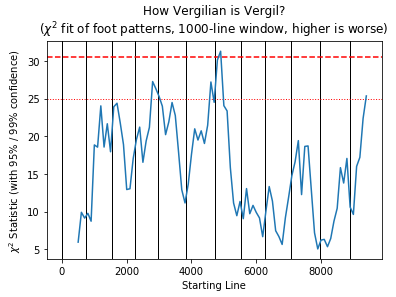

In [146]:
from matplotlib import pyplot as plt
fig=plt.figure()
plt.title("How Vergilian is Vergil?\n($\chi^{2}$ fit of foot patterns, 1000-line window, higher is worse)")
ax1 = fig.add_subplot(111)

ax1.set_xlabel("Starting Line")
plt.ylabel("$\chi^{2}$ Statistic (with 95% / 99% confidence)")

# Set up the ticks to match the centre of the rolling window of lines
x = [(i*100)+500 for i in range(len(data))]

# Draw a vertical line at the start of each book
for s in starts:
    ax1.axvline(s, color='black', linewidth=1)

# Draw lines for the 99 and 95% critical values for
# chisquare with 15 degrees of freedom (from a table)
ax1.axhline(30.578, color='r', linestyle='--')
ax1.axhline(24.996, color='r', linestyle=':', linewidth=1)

ax1.plot(x,data)
fig.show()
#fig.savefig('how_verg_is_verg.pdf')